# **Visualizing Real Seismic Waveforms**

In this notebook, we work with **real seismic data** using the `ObsPy` library. We'll retrieve waveform data from the **IRIS seismic data center**, clean it, and explore it using time series plots and spectrograms.

This demonstrates real-world data handling and visualization—a key skill for seismology, geophysics, and signal processing roles.


#Explaination of the code  

#**connecting to FDSN client**  
from obspy.clients.fdsn import Client  
client = Client("IRIS")

#**Defining time and stations**  
from obspy import UTCDateTime  
starttime = UTCDateTime("2020-01-01T00:00:00")  
endtime = starttime + 60 * 5  # 5 minutes of data  

network = "IU"  
station = "ANMO"  
location = "00"  
channel = "BHZ"  

#**downloading and previewing the waveforms**  
st = client.get_waveforms(network, station, location, channel, starttime, endtime)  

#**filter+trim (Processing)**  
st.detrend("linear")  
st.filter("bandpass", freqmin=0.1, freqmax=1)  

#**custom plotting with matplot**  
import matplotlib.pyplot as plt  
tr = st[0]   # Get first Trace object  
plt.figure(figsize=(10, 4))  
plt.plot(tr.times(), tr.data, label="Seismic Signal")  
plt.xlabel("Time (s)")  
plt.ylabel("Amplitude")  
plt.title(f"{station} {channel} Signal from {starttime.date}")  
plt.grid(True)  
plt.legend()  
plt.tight_layout()  
plt.show()  

In [1]:
from obspy import read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
import matplotlib.pyplot as plt
import numpy as np

# Inline plots for notebooks
%matplotlib inline


In [2]:
# Fetching a real seismic waveform from IRIS
# Connect to IRIS
client = Client("IRIS")

# Set time and station details
starttime = UTCDateTime("2020-01-01T00:00:00")
endtime = starttime + 5 * 60  # 5 minutes of data

# Download waveform: IU network, ANMO station (Albuquerque, NM), BHZ channel
st = client.get_waveforms(network="IU", station="ANMO", location="00", channel="BHZ",
                          starttime=starttime, endtime=endtime)

# Print metadata
print(st)


1 Trace(s) in Stream:
IU.ANMO.00.BHZ | 2020-01-01T00:00:00.019538Z - 2020-01-01T00:04:59.994538Z | 40.0 Hz, 12000 samples



**About the Station & Channel**
- `IU` is a global seismic network maintained by the US.
- `ANMO` is a well-known station in Albuquerque, NM.
- `BHZ` refers to:  
  - **B**: Broadband  
  - **H**: High-gain  
  - **Z**: Vertical component of motion


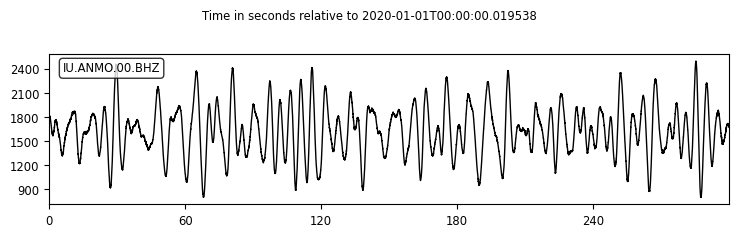

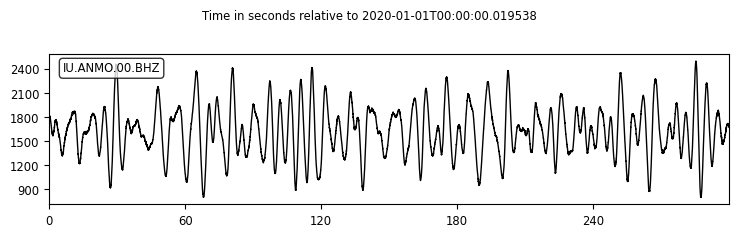

In [3]:
#Plotting raw waveform
# Quick view with built-in plotting
st.plot(type="relative", title="Raw Seismic Waveform - IU.ANMO.BHZ")


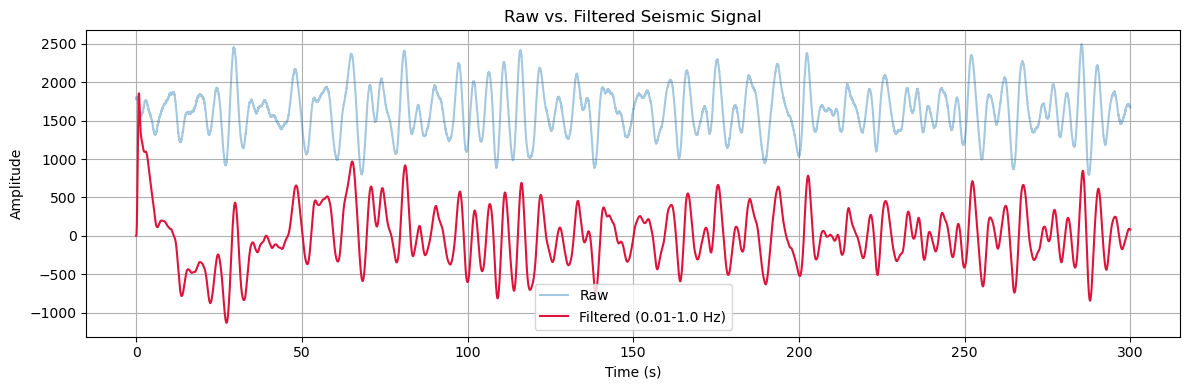

In [4]:
# Clean signal by applying a bandpass filter
st_filtered = st.copy()
st_filtered.filter("bandpass", freqmin=0.01, freqmax=1.0)

# Compare raw and filtered
plt.figure(figsize=(12, 4))
plt.plot(st[0].times(), st[0].data, label="Raw", alpha=0.4)
plt.plot(st_filtered[0].times(), st_filtered[0].data, label="Filtered (0.01-1.0 Hz)", color='crimson')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Raw vs. Filtered Seismic Signal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Why Filtering?**
- Seismic signals contain a mix of noise and useful wave energy.
- A **bandpass filter** helps isolate the range of frequencies (e.g. 0.01–1 Hz) where earthquake signals typically show up.
- Filtering makes it easier to identify P-waves, S-waves, or surface waves.


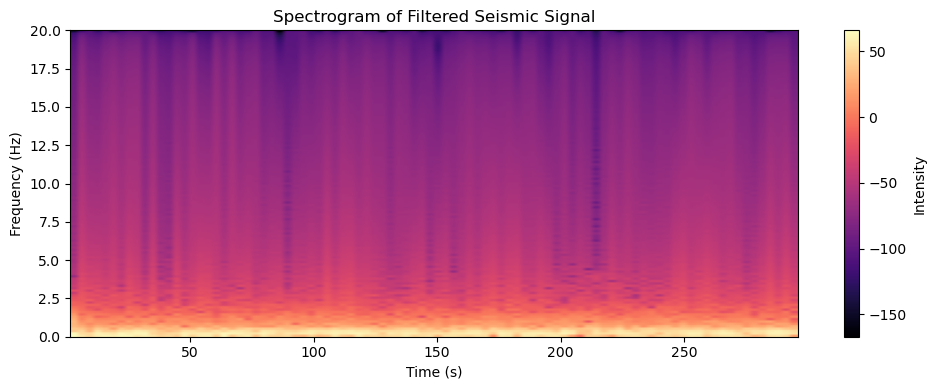

In [5]:
#Spectogram for real data
plt.figure(figsize=(10, 4))
plt.specgram(st_filtered[0].data, Fs=st_filtered[0].stats.sampling_rate, cmap="magma")
plt.title("Spectrogram of Filtered Seismic Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity")
plt.tight_layout()
plt.show()


 **Spectrogram Analysis**
- Brighter regions = stronger frequencies.
- we may spot **low-frequency bursts** during the earthquake.
- This helps identify arrival times and wave types.


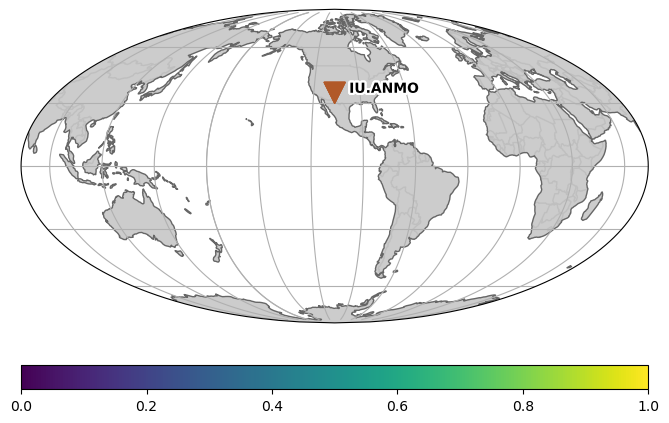

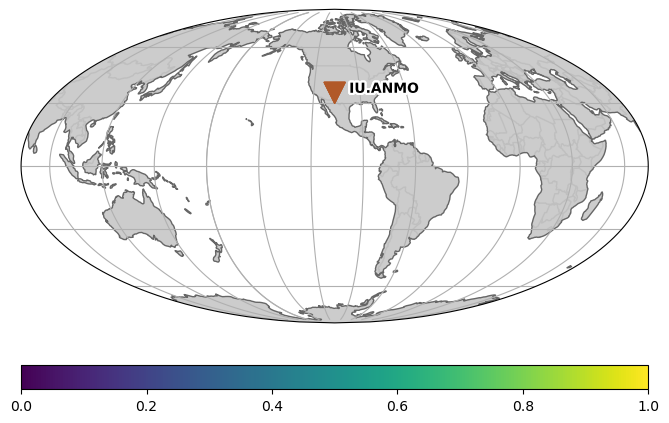

In [6]:
#satation metadata (location)
inv = client.get_stations(network="IU", station="ANMO", level="response")
inv.plot()

In [8]:
#Normalising the data (progressing to ML)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(st_filtered[0].data.reshape(-1, 1)).flatten()
# Print normalized data and its statistics
print("Normalized Seismic Data:", normalized_data[:10])  # Print first 10 normalized values for inspection
print("Mean of Normalized Data:", normalized_data.mean())
print("Standard Deviation of Normalized Data:", normalized_data.std())



Normalized Seismic Data: [-2.99563968e-04  7.70117148e-04  4.77726971e-03  1.49567626e-02
  3.52435458e-02  6.97006958e-02  1.22090642e-01  1.95566766e-01
  2.92471458e-01  4.14227749e-01]
Mean of Normalized Data: -4.736951571734001e-18
Standard Deviation of Normalized Data: 1.0
